In [1]:
import numpy as np
import math
import logging
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from tqdm import tqdm_notebook as tqdm
warnings.filterwarnings("ignore",message="numpy.dtype size changed")
from scipy.special import comb
from collections import defaultdict 
import random
import subprocess
import pickle
from IPython.display import SVG
from collections import OrderedDict
import matplotlib.pyplot as plt

import msprime
import tsinfer

/home/wilderwohns/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Heatmap

In [12]:
analytical_result_51 = np.reshape(np.loadtxt("data/analytical_predictions(51, 51, 51, 51).txt"),(51,51,51,51))

In [13]:
i_j = np.zeros((50,50))
for i in range(1,50,1):
    
    for j in range(1,50,1):
        i_j[i,j] = np.nanmean(analytical_result_51[i,:,j,:])

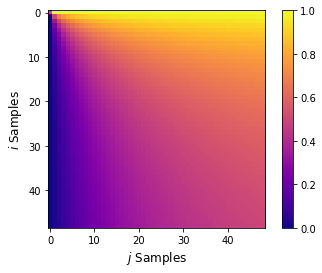

In [14]:
#plt.figure(figsize=(10,10))
im = plt.imshow(i_j[1:50,1:50],cmap="plasma")
plt.colorbar()
xlabel = plt.xlabel("$\it{j}$ Samples",fontsize=12)
ylabel = plt.ylabel("$\it{i}$ Samples",fontsize=12)
#plt.savefig('heatmap_smaller_label.eps', format='eps', dpi=200,bbox_extra_artists=(xlabel,ylabel), bbox_inches='tight')

Get average accuracy for all i,j,k,m

In [15]:
total_val = 0
for i in range(1,50):
    for j in range(1,50):
        total_val += 1/(i*j)

theta = 1/total_val
        
q_bar = 0
for i in range(1,50):
    for j in range(1,50):
        if i <= j:
            q_bar += theta/((i*j)) * i_j[i,j]
        else:
            q_bar += theta/((i*j)) * (1-i_j[i,j])

In [16]:
q_bar

0.8240836808549863

# Frequency vs Distance

0.8312786005894791
0.8306500442555779


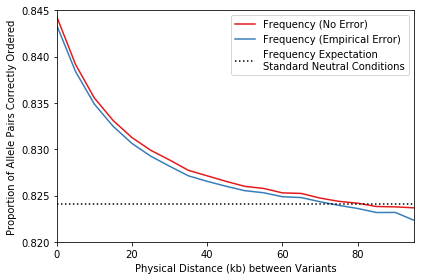

In [17]:
master_dataframe = pd.read_csv("freq_compare_transfer/data/frequency_distance_accuracy_singletons.csv")
plt.plot(range(0,100,5),master_dataframe.Agree/master_dataframe.Total,label="Frequency (No Error)",color="#e41a1c")
plt.plot(range(0,100,5),master_dataframe.ErrorAgree/master_dataframe.TotalError,label="Frequency (Empirical Error)",color="#377eb8")

plt.ylim(0.82,0.845)
plt.xlim(0,95)
plt.axhline(y=0.8240836808549863,color="black",linestyle=":",label="Frequency Expectation\nStandard Neutral Conditions")
plt.xlabel("Physical Distance (kb) between Variants")
plt.ylabel("Proportion of Allele Pairs Correctly Ordered")
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
lgd = plt.legend(by_label.values(), by_label.keys())
plt.tight_layout()
#plt.savefig('frequency_distance_100k_replicates.eps', format='eps', dpi=1000, bbox_extra_artists=(lgd,xlabel,ylabel), bbox_inches='tight')
print(sum(master_dataframe.Agree)/sum(master_dataframe.Total))
print(sum(master_dataframe.ErrorAgree)/sum(master_dataframe.TotalError))


# Plot GEVA, Frequency with and without demographic model

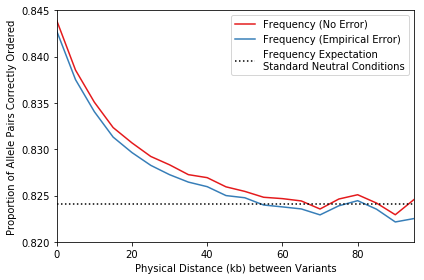

In [18]:
master_dataframe = pd.read_csv("geva_comparison/data/GEVA_frequency_distance_accuracy.csv")

plt.plot(range(0,100,5),master_dataframe.Agree/master_dataframe.Total,label="Frequency (No Error)",color="#e41a1c")
plt.plot(range(0,100,5),master_dataframe.AgreeError/master_dataframe.TotalError,label="Frequency (Empirical Error)",color="#377eb8")

plt.ylim(0.82,0.845)
plt.xlim(0,95)
plt.axhline(y=0.8240836808549863,color="black",linestyle=":",label="Frequency Expectation\nStandard Neutral Conditions")
plt.xlabel("Physical Distance (kb) between Variants")
plt.ylabel("Proportion of Allele Pairs Correctly Ordered")
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
lgd = plt.legend(by_label.values(), by_label.keys())
plt.tight_layout()
#plt.savefig('frequency_distance.eps', format='eps', dpi=1000, bbox_extra_artists=(lgd,xlabel,ylabel), bbox_inches='tight')


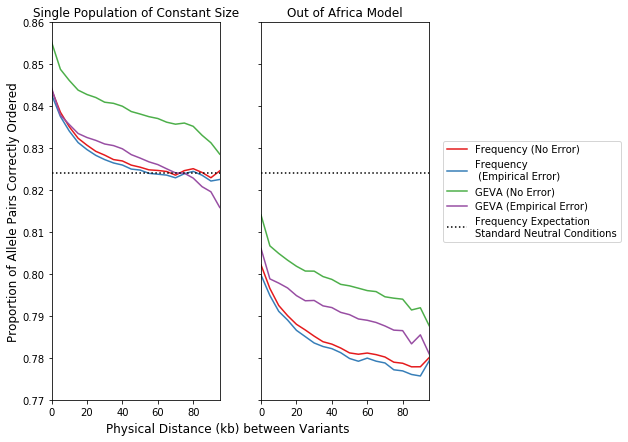

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(6, 6))
master_dataframe = pd.read_csv("geva_comparison/data/GEVA_frequency_distance_accuracy.csv")

ax[0].plot(range(0,100,5),master_dataframe.Agree/master_dataframe.Total,label="Frequency (No Error)",color="#e41a1c")
ax[0].plot(range(0,100,5),master_dataframe.AgreeError/master_dataframe.TotalError,label="Frequency\n (Empirical Error)",color="#377eb8")
ax[0].plot(range(0,100,5),master_dataframe.AgreeGeva/master_dataframe.Total,label="GEVA (No Error)",color="#4daf4a")
ax[0].plot(range(0,100,5),master_dataframe.AgreeGevaError/master_dataframe.TotalError,label="GEVA (Empirical Error)",color="#984ea3")

ax[0].set_ylim(0.77,0.86)
ax[0].set_xlim(0,95)
ax[0].axhline(y=0.8240836808549863,color="black",linestyle=":",label="Expectation for Accuracy of Frequency\n Under Standard Neutral Conditions")

#ax[0].set_xticks(np.arange(0, 20, step=4))
ax[0].set_title("Single Population of Constant Size")

ooa = pd.read_csv("out_of_africa_fig_transfer/data/GEVA_frequency_distance_accuracy.csv")

ax[1].plot(range(0,100,5),ooa.Agree/ooa.Total,label="Frequency (No Error)",color="#e41a1c")
ax[1].plot(range(0,100,5),ooa.AgreeError/ooa.TotalError,label="Frequency\n (Empirical Error)",color="#377eb8")
ax[1].plot(range(0,100,5),ooa.AgreeGeva/ooa.Total,label="GEVA (No Error)",color="#4daf4a")
ax[1].plot(range(0,100,5),ooa.AgreeGevaError/ooa.TotalError,label="GEVA (Empirical Error)",color="#984ea3")

ax[1].set_ylim(0.77,0.86)
ax[1].set_xlim(0,95)
ax[1].axhline(y=0.8240836808549863,color="black",linestyle=":",label="Frequency Expectation\nStandard Neutral Conditions")
ax[1].set_title("Out of Africa Model")

xlabel=fig.text(0.5, -0.01, "Physical Distance (kb) between Variants", ha='center',fontsize=12)
ylabel=fig.text(-0.01, 0.5, "Proportion of Allele Pairs Correctly Ordered", va='center', rotation='vertical',fontsize=12)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
lgd = plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(2.17, 0.7))
plt.tight_layout()
#plt.savefig('joined_geva_comparison_ooa_plots.eps', format='eps', dpi=1000, bbox_extra_artists=(lgd,xlabel,ylabel), bbox_inches='tight')


# Directly Comparable Figure

0.9163624120903786
0.915131505497838
0.8955395465320491
0.8862762688338661


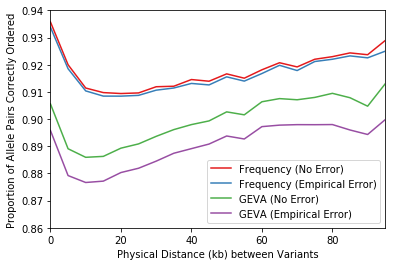

In [21]:
master_dataframe = pd.read_csv("directly_comparable/data/ancestrally_linked_GEVA_frequency_distance_accuracy.csv")
plt.plot(range(0,100,5),master_dataframe.Agree/master_dataframe.Total,label="Frequency (No Error)",color="#e41a1c")
plt.plot(range(0,100,5),master_dataframe.AgreeError/master_dataframe.TotalError,label="Frequency (Empirical Error)",color="#377eb8")
plt.plot(range(0,100,5),master_dataframe.AgreeGeva/master_dataframe.Total,label="GEVA (No Error)",color="#4daf4a")
plt.plot(range(0,100,5),master_dataframe.AgreeGevaError/master_dataframe.TotalError,label="GEVA (Empirical Error)",color="#984ea3")
# plt.xlabel("Distance Separating Alleles (bp)")

plt.xlabel("Physical Distance (kb) between Variants")
plt.ylabel("Proportion of Allele Pairs Correctly Ordered")
plt.ylim(0.86,0.94)
plt.xlim(0,95)
plt.axhline(y=0.8240836808549863,color="black",linestyle=":")
plt.legend()

#plt.savefig('directly_comparable_plot.eps', format='eps', dpi=1000)
print(sum(master_dataframe.Agree)/sum(master_dataframe.Total))
print(sum(master_dataframe.AgreeError)/sum(master_dataframe.TotalError))
print(sum(master_dataframe.AgreeGeva)/sum(master_dataframe.Total))
print(sum(master_dataframe.AgreeGevaError)/sum(master_dataframe.TotalError))